In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
youtubers_df = pd.read_csv("youtubers_df.csv")
youtubers_df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [3]:
youtubers_df.shape

(1000, 9)

# Data Cleaning

In [4]:
null_youtubers_df = pd.DataFrame(youtubers_df.isna().sum().sort_values())
null_youtubers_df

,0
Rank,0
Username,0
Suscribers,0
Country,0
Visits,0
Likes,0
Comments,0
Links,0
Categories,306


In [5]:
null_youtubers_df.rename(columns ={ 0 : 'null_count'}, inplace=True)
null_youtubers_df

,null_count
Rank,0
Username,0
Suscribers,0
Country,0
Visits,0
Likes,0
Comments,0
Links,0
Categories,306


In [6]:
null_youtubers_df['null_pct'] = null_youtubers_df['null_count']/youtubers_df.shape[0]*100
null_youtubers_df

,null_count,null_pct
Rank,0,0.0
Username,0,0.0
Suscribers,0,0.0
Country,0,0.0
Visits,0,0.0
Likes,0,0.0
Comments,0,0.0
Links,0,0.0
Categories,306,30.6


# Replace null values of 'Categories' column

In [7]:
youtubers_df['Categories'] = youtubers_df['Categories'].fillna('Unknown')

In [8]:
youtubers_df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


# Rename column name : 'Suscribers' -> 'Subscribers'

In [9]:
youtubers_df.rename(columns= { 'Suscribers' : 'Subscribers'}, inplace=True)

# Data Exploration & Data Visualization¶

# 1. Distribution of subscribers, views, likes, and comments by boxplot.**¶

In [10]:
youtubers_df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


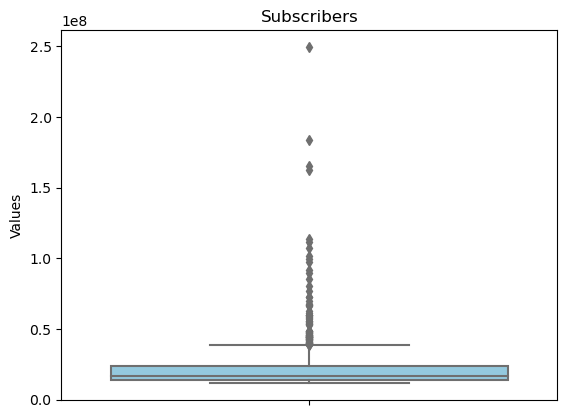

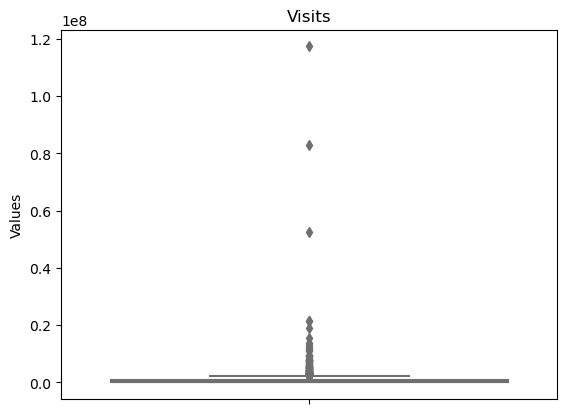

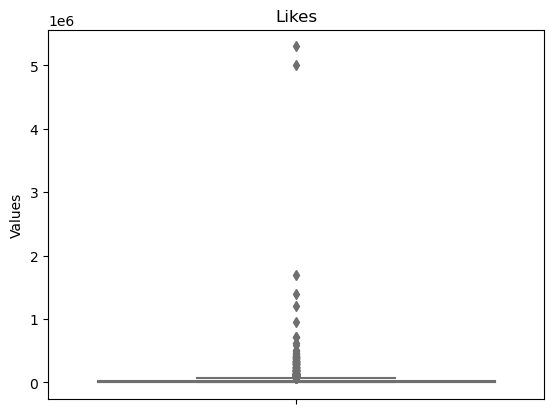

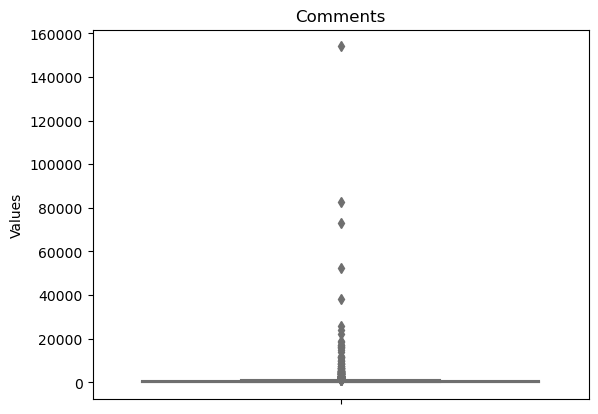

In [11]:
stat_youtubers_df = youtubers_df[['Subscribers', 'Visits', 'Likes', 'Comments']]

for col in stat_youtubers_df.columns:
    plt.figure()
    sns.boxplot(y=stat_youtubers_df[col], color='skyblue')
    plt.title(f'{col}')
    plt.ylabel('Values')
       
plt.show()

# 2. Top 10 most popular Youtube channel (content) by viewers (Visits)¶

In [12]:
top10_contents_youtubers_df = pd.DataFrame(youtubers_df[['Username', 'Categories', 'Visits']].sort_values('Visits', ascending=False).head(10).reset_index())
top10_contents_youtubers_df.rename(columns= {'Username':'Youtube channel', 'Categories':'Contents'}, inplace=True)
top10_contents_youtubers_df.reset_index()

del top10_contents_youtubers_df['index']
top10_contents_youtubers_df

,Youtube channel,Contents,Visits
0,MrBeast,"Videojuegos, Humor",117400000.0
1,MrBeast2,Vlogs diarios,83100000.0
2,DaFuqBoom,"Animación, Humor",52700000.0
3,BeastPhilanthropy,Comida y bebida,21500000.0
4,VillageCookingChannel,Unknown,21500000.0
5,jaanvipatel,Unknown,19100000.0
6,_vector_,Unknown,15400000.0
7,dojacat,Música y baile,13600000.0
8,alfredolarin,Unknown,12900000.0
9,NickPro,Deportes,12200000.0


In [13]:
top10_contents_youtubers_df.to_csv('top10_Youtube_channel_contents_youtubers_df.csv')

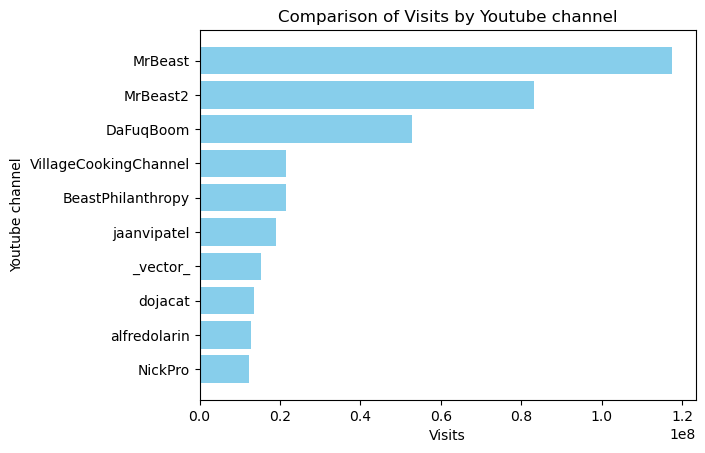

In [14]:
plt.barh(top10_contents_youtubers_df.sort_values('Visits', ascending=True)['Youtube channel'], top10_contents_youtubers_df.sort_values('Visits', ascending=True)['Visits'], color='skyblue')
plt.xlabel('Visits')
plt.ylabel('Youtube channel')
plt.title('Comparison of Visits by Youtube channel')
plt.show()

# 3. Type of content do viewers in each country like the most¶

In [15]:
unique_country = list(youtubers_df['Country'].unique())

In [16]:
len(unique_country)

29

In [17]:
max_visits_by_country = youtubers_df.loc[youtubers_df.groupby('Country')['Visits'].idxmax()]

result = []
# Show result
for index, row in max_visits_by_country.iterrows():
    youtube_channel = row['Username']
    country = row['Country']
    category = row['Categories']
    visits =  row['Visits']
    likes = row['Likes']
    result.append({'Username': youtube_channel,'Country': country, 'Category': category, 'Visits': visits, 'Likes': likes})
    max_visits_content_by_country = pd.DataFrame(result)\
                                  .sort_values('Visits', ascending=False)\
                                  .reset_index()

del max_visits_content_by_country['index']
max_visits_content_by_country.rename(columns= {'Username':'Youtube channel', 'Category':'Contents'}, inplace=True)
max_visits_content_by_country

,Youtube channel,Country,Contents,Visits,Likes
0,MrBeast,Estados Unidos,"Videojuegos, Humor",117400000.0,5300000.0
1,VillageCookingChannel,India,Unknown,21500000.0,321500.0
2,alfredolarin,El Salvador,Unknown,12900000.0,707600.0
3,A4a4a4a4,Rusia,"Animación, Humor",9700000.0,330400.0
4,Sidemen,Reino Unido,"Videojuegos, Humor",9200000.0,284800.0
5,GoAmiGo,Colombia,Vlogs diarios,7900000.0,455300.0
6,fedevigevani,México,"Animación, Humor",7700000.0,412200.0
7,CoComelon,Unknown,Educación,7000000.0,24700.0
8,AlejoIgoa,Argentina,Animación,5700000.0,208400.0
9,shfa-1,Francia,Vlogs diarios,5300000.0,57300.0


In [18]:
max_visits_content_by_country.to_csv('max_visits_content_by_country.csv')

# 4. Comparison of Subscribers, Visits, Likes, and Comments¶


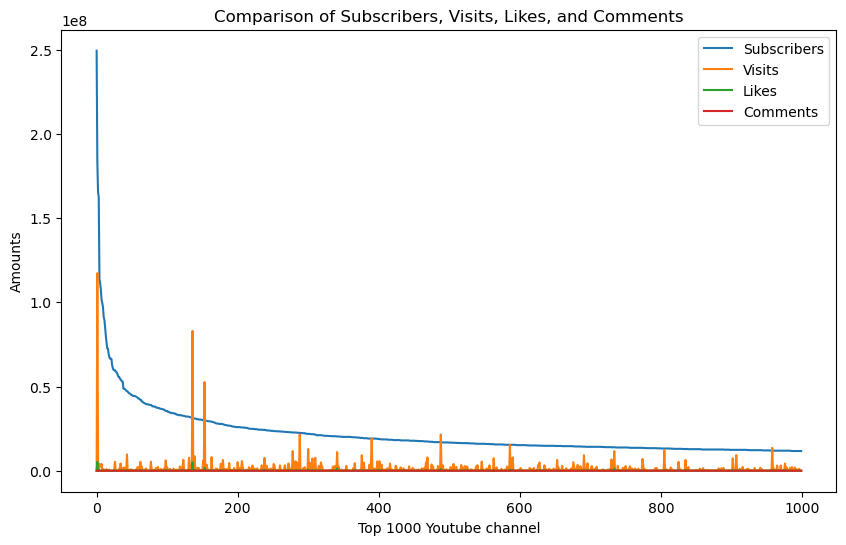

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(youtubers_df.index, youtubers_df['Subscribers'], label='Subscribers')
plt.plot(youtubers_df.index, youtubers_df['Visits'], label='Visits')
plt.plot(youtubers_df.index, youtubers_df['Likes'], label='Likes')
plt.plot(youtubers_df.index, youtubers_df['Comments'], label='Comments')

plt.xlabel('Top 1000 Youtube channel')
plt.ylabel('Amounts')
plt.title('Comparison of Subscribers, Visits, Likes, and Comments')
plt.legend()

plt.show()

# 5. YouTube channels with the most engaged viewers.¶

In [20]:
youtubers_df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [21]:
stat_youtubers_channel = pd.DataFrame(youtubers_df[['Username','Subscribers', 'Visits', 'Likes', 'Comments']]).reset_index()
engagement = pd.DataFrame(np.sum(youtubers_df[['Likes', 'Comments']], axis=1)).rename(columns= {0:'Engagement'}).reset_index()

In [22]:
stat_youtubers_engagement = pd.merge(stat_youtubers_channel, engagement, on='index').rename(columns= {'Username':'Youtube channel'})

In [23]:

stat_youtubers_engagement['%EGM/Subs'] = stat_youtubers_engagement['Engagement']/stat_youtubers_engagement['Subscribers']*100
stat_youtubers_engagement['%Visits/Subs'] = stat_youtubers_engagement['Visits']/stat_youtubers_engagement['Subscribers']*100
stat_youtubers_engagement['%EGM/Visits'] = stat_youtubers_engagement['Engagement']/stat_youtubers_engagement['Visits']*100

In [24]:
stat_youtubers_engagement.head()

,index,Youtube channel,Subscribers,Visits,Likes,Comments,Engagement,%EGM/Subs,%Visits/Subs,%EGM/Visits
0,0,tseries,249500000.0,86200.0,2700.0,78.0,2778.0,0.001113,0.034549,3.222738
1,1,MrBeast,183500000.0,117400000.0,5300000.0,18500.0,5318500.0,2.898365,63.978202,4.530239
2,2,CoComelon,165500000.0,7000000.0,24700.0,0.0,24700.0,0.014924,4.229607,0.352857
3,3,SETIndia,162600000.0,15600.0,166.0,9.0,175.0,0.000108,0.009594,1.121795
4,4,KidsDianaShow,113500000.0,3900000.0,12400.0,0.0,12400.0,0.010925,3.436123,0.317949


# 5.1 Correlation variables : Subscribers, Visits, Engagement (Likes + Comments)¶

<Axes: >

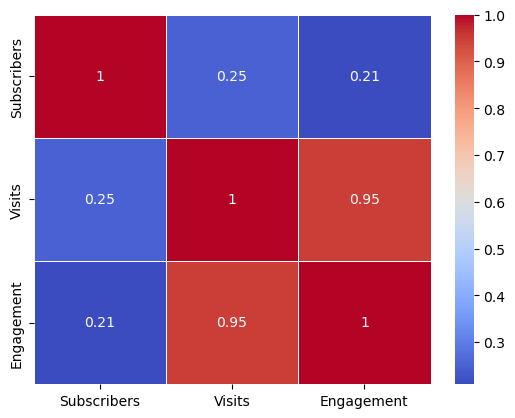

In [25]:
sns.heatmap(data=round(stat_youtubers_engagement[['Subscribers', 'Visits', 'Engagement']].corr(),2),cmap='coolwarm',linewidth= 0.5,annot=True)

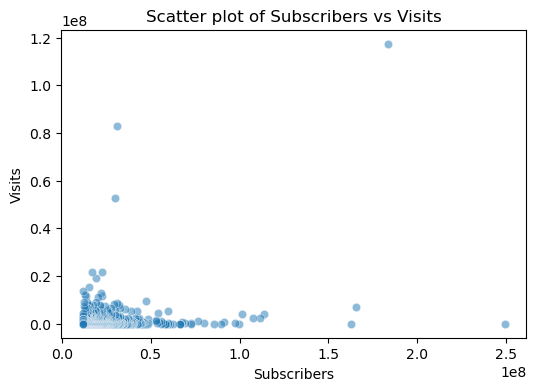

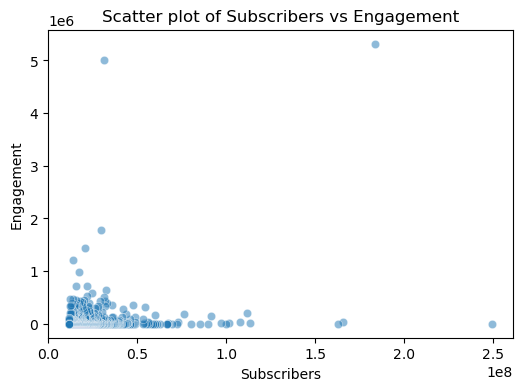

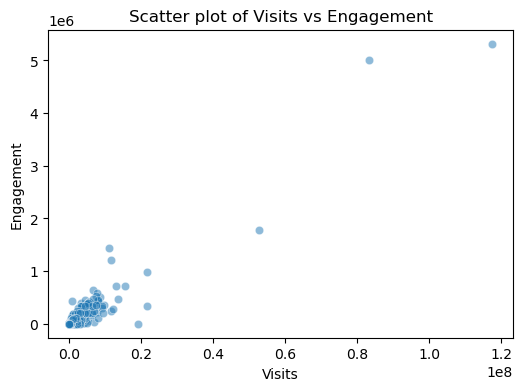

In [26]:
data1 = stat_youtubers_engagement
variables = ['Subscribers', 'Visits', 'Engagement']

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data1, x=variables[i], y=variables[j], alpha=0.5)
        plt.title(f'Scatter plot of {variables[i]} vs {variables[j]}')
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.show()

In [27]:
stat_youtubers_engagement[['Subscribers', 'Visits', 'Engagement']].describe()

,Subscribers,Visits,Engagement
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.189440e+07,1.209446e+06,5.492136e+04
std,1.682775e+07,5.229942e+06,2.603337e+05
min,1.170000e+07,0.000000e+00,0.000000e+00
25%,1.380000e+07,3.197500e+04,5.077500e+02
50%,1.675000e+07,1.744500e+05,3.662000e+03
75%,2.370000e+07,8.654750e+05,2.954175e+04
max,2.495000e+08,1.174000e+08,5.318500e+06


# 5.2 Correlation of : %Visits/Subs, %EGM/Visits, %EGM/Subs¶

<Axes: >

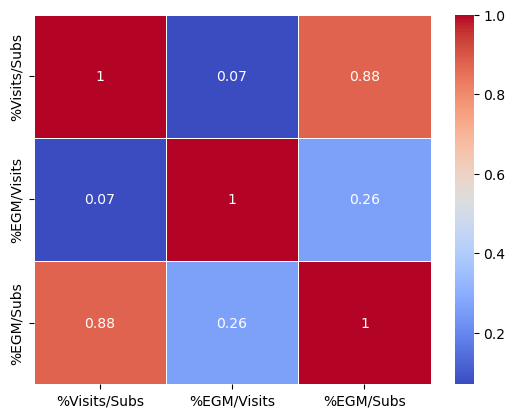

In [28]:
sns.heatmap(data=round(stat_youtubers_engagement[['%Visits/Subs', '%EGM/Visits', '%EGM/Subs']].corr(),2),cmap='coolwarm',linewidth= 0.5,annot=True)

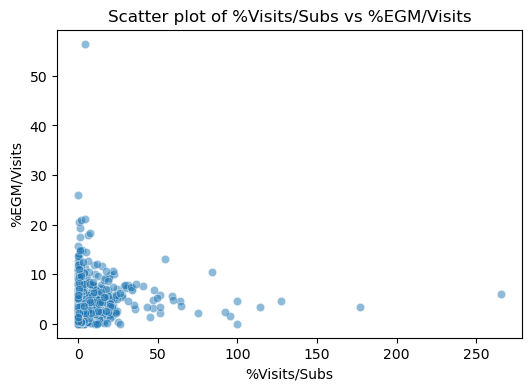

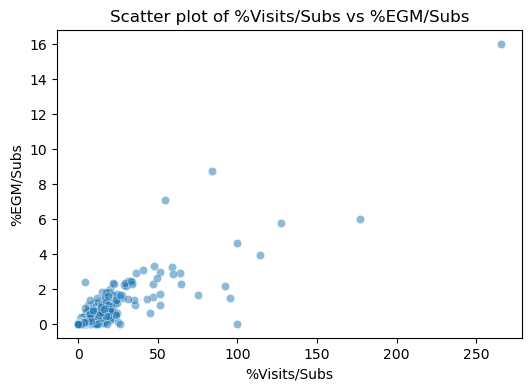

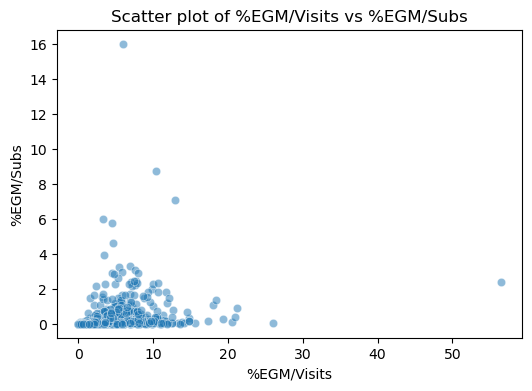

In [29]:
data1 = stat_youtubers_engagement
variables = ['%Visits/Subs', '%EGM/Visits', '%EGM/Subs']

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data1, x=variables[i], y=variables[j], alpha=0.5)
        plt.title(f'Scatter plot of {variables[i]} vs {variables[j]}')
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.show()

In [30]:
stat_youtubers_engagement[['%Visits/Subs', '%EGM/Visits', '%EGM/Subs']].describe()

,%Visits/Subs,%EGM/Visits,%EGM/Subs
count,1000.000000,977.000000,1000.000000
mean,5.628703,3.833799,0.257369
std,15.578419,3.740130,0.827948
min,0.000000,0.000000,0.000000
25%,0.163592,1.307692,0.002411
50%,0.941563,2.970222,0.019680
75%,4.308510,5.323237,0.164704
max,265.495208,56.475528,16.011502


# 5.3 Youtube channels which have %Visits/Subs > 45%¶

In [31]:
data2 = stat_youtubers_engagement[ (stat_youtubers_engagement['%Visits/Subs'] > 45)]\
.sort_values(['%Visits/Subs'], ascending=False)\
.reset_index()\
.drop(columns= 'index')\
.drop(columns= 'level_0')
data2

,Youtube channel,Subscribers,Visits,Likes,Comments,Engagement,%EGM/Subs,%Visits/Subs,%EGM/Visits
0,MrBeast2,31300000.0,83100000.0,5000000.0,11600.0,5011600.0,16.011502,265.495208,6.030806
1,DaFuqBoom,29800000.0,52700000.0,1700000.0,82800.0,1782800.0,5.982550,176.845638,3.382922
2,BeastPhilanthropy,16900000.0,21500000.0,952100.0,24000.0,976100.0,5.775740,127.218935,4.540000
3,dojacat,11900000.0,13600000.0,395300.0,73000.0,468300.0,3.935294,114.285714,3.443382
4,jaanvipatel,19100000.0,19100000.0,0.0,2200.0,2200.0,0.011518,100.000000,0.011518
5,_vector_,15400000.0,15400000.0,712400.0,1200.0,713600.0,4.633766,100.000000,4.633766
6,VillageCookingChannel,22500000.0,21500000.0,321500.0,5900.0,327400.0,1.455111,95.555556,1.522791
7,NickPro,13200000.0,12200000.0,286000.0,245.0,286245.0,2.168523,92.424242,2.346270
8,Mythpat,13900000.0,11700000.0,1200000.0,15800.0,1215800.0,8.746763,84.172662,10.391453
9,scottsreality,12400000.0,9300000.0,199200.0,1600.0,200800.0,1.619355,75.000000,2.159140


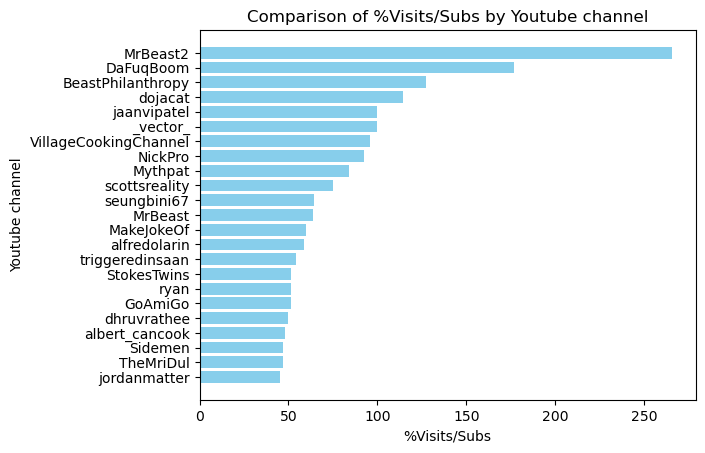

In [32]:
plt.barh(data2.sort_values('%Visits/Subs', ascending=True)['Youtube channel'], data2.sort_values('%Visits/Subs', ascending=True)['%Visits/Subs'], color='skyblue')
plt.xlabel('%Visits/Subs')
plt.ylabel('Youtube channel')
plt.title('Comparison of %Visits/Subs by Youtube channel')
plt.show()

# 5.4 Youtube channels which have %EGM/Visits > 10%¶

In [33]:
data3 = stat_youtubers_engagement[ (stat_youtubers_engagement['%EGM/Visits'] > 10)]\
.sort_values(['%EGM/Visits'], ascending=False)\
.reset_index()\
.drop(columns= 'index')\
.drop(columns= 'level_0')
data3

,Youtube channel,Subscribers,Visits,Likes,Comments,Engagement,%EGM/Subs,%Visits/Subs,%EGM/Visits
0,BispoBrunoLeonardo,18000000.0,762100.0,276400.0,154000.0,430400.0,2.391111,4.233889,56.475528
1,CNCOMusic,11900000.0,8400.0,2100.0,83.0,2183.0,0.018345,0.070588,25.988095
2,piuzinho,12800000.0,527100.0,107700.0,3800.0,111500.0,0.871094,4.117969,21.153481
3,prantoniojunior,13300000.0,246300.0,46500.0,5100.0,51600.0,0.387970,1.851880,20.950061
4,whindersson,44400000.0,174600.0,35700.0,154.0,35854.0,0.080752,0.393243,20.534937
5,BTS,76500000.0,969700.0,180300.0,7400.0,187700.0,0.245359,1.267582,19.356502
6,luismendez1405,13600000.0,1000000.0,182000.0,1600.0,183600.0,1.350000,7.352941,18.360000
7,StrayKids,14100000.0,839600.0,146500.0,4300.0,150800.0,1.069504,5.954610,17.960934
8,BLACKPINK,91300000.0,863200.0,146900.0,3400.0,150300.0,0.164622,0.945455,17.411956
9,demilovato,18000000.0,34300.0,5200.0,166.0,5366.0,0.029811,0.190556,15.644315


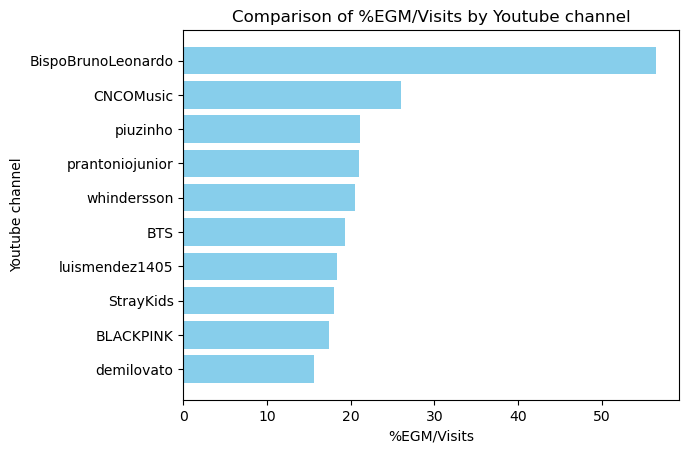

In [34]:
plt.barh(data3.head(10).sort_values('%EGM/Visits', ascending=True)['Youtube channel'], data3.head(10).sort_values('%EGM/Visits', ascending=True)['%EGM/Visits'], color='skyblue')
plt.xlabel('%EGM/Visits')
plt.ylabel('Youtube channel')
plt.title('Comparison of %EGM/Visits by Youtube channel')
plt.show()

# 5.5 Youtube channels which have %Visits/Subs > 45% and %EGM/Visits > 10%¶

In [35]:
stat_youtubers_engagement[ (stat_youtubers_engagement['%Visits/Subs'] > 45) & (stat_youtubers_engagement['%EGM/Visits'] > 10)]\
.sort_values(['%Visits/Subs'], ascending=False)\
.reset_index()\
.drop(columns= 'index')\
.drop(columns= 'level_0')

,Youtube channel,Subscribers,Visits,Likes,Comments,Engagement,%EGM/Subs,%Visits/Subs,%EGM/Visits
0,Mythpat,13900000.0,11700000.0,1200000.0,15800.0,1215800.0,8.746763,84.172662,10.391453
1,triggeredinsaan,20400000.0,11100000.0,1400000.0,38000.0,1438000.0,7.049020,54.411765,12.954955


# 6. In each country there are How many YouTubers are there?¶

In [36]:
youtubers_df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [37]:
data4 = youtubers_df['Country'].value_counts().reset_index()
data4

,Country,count
0,Estados Unidos,293
1,India,241
2,Unknown,171
3,Brasil,64
4,México,58
5,Indonesia,38
6,Rusia,25
7,Tailandia,18
8,Colombia,16
9,Filipinas,13


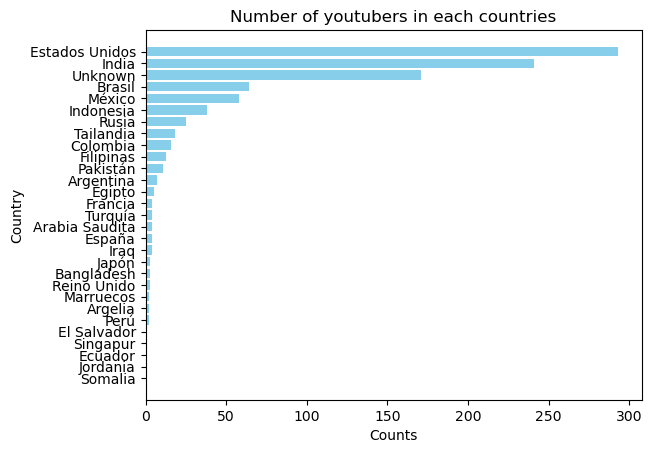

In [38]:
plt.barh(data4.sort_values('count', ascending=True)['Country'], data4.sort_values('count', ascending=True)['count'], color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Country')
plt.title('Number of youtubers in each countries')
plt.show()